## Learning Algorithm

The environment was solved by using a single agent with self-play. Deep Deterministic Policy Gradient (DDPG) was used as learning algorithm (see also https://arxiv.org/abs/1509.02971). The algorithms uses two neural networks: One to approximate the action-value function (critic network) and one to implement the policy (actor network). During each update, the critic is optimized to better fit the action-value function according to:

$a_{t+1} = actor(s_{t+1})$

$Q_{target} = r + (\gamma * critic(s_{t+1}, a_{t+1}))$

$Q_{expected} = critic(s_{t}, a_{t})$

$L = \sqrt{(Q_{expected} - Q_{target})^2}$

where $L$ is the loss to be minimized.

The actor is optimized to pick the action with the highest value predicted by the critic.

### Parameters

| parameter | value | comment |
| --- | --- | --- |
| tau | $1e^{-2}$ | soft update of target parameters |
| gamma | 0.95 | discount factor |
| BUFFER_SIZE | $1e^6$ | replay buffer size |
| BATCH_SIZE | 128 | minibatch size |
| GRAD_CLIP | 1.0 | clipping of gradient for critic |


### Noise for exploration

Ornstein-Uhlenbeck process

| parameter | value |
| --- | --- |
| mu |  0 |
| theta |  0.15 |
| sigma |  0.05 |

The scale of the noise was reduced each update by muliplying it by $0.9995$


### Actor Neural Network

Three stacked dense layers with 

| layer | parameters |
| --- | --- |
| batch normalization |   |
| dense | 64 nodes |
| activation |  leaky Relu |
| dense|  dense 4 nodes for action values |

Optimized with Adam at learning rate $1e-4$


### Critic Neural Network

Three stacked dense layers with 

| layer | parameters |
| --- | --- |
| batch normalization |   |
| dense | 64 nodes |
| activation |  leaky Relu |
| dense | 32 nodes + 4 actions added in |
| activation |  leaky Relu |
| dense|  dense 1 nodes for q values |

Optimized with Adam at learning rate $1e-4$


## Plot of Rewards

The data was created with the `Tennis.ipynb`. The environment was solved first in episode $200$.




In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv('scores.csv')
data_running_avg = data.rolling(100).mean()[100::100]
data_running_avg

,score
100,0.93
200,4.52
300,6.38
400,7.60
500,9.24
600,10.90
700,11.44
800,11.77
900,12.75
1000,13.83


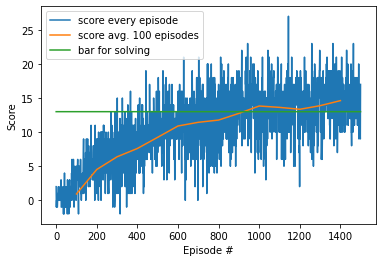

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(data.index, data.score, label='score every episode')
plt.plot(data_running_avg.index, data_running_avg.score, label='score avg. 100 episodes')
plt.plot(data.index, [13] * len(data), label='bar for solving')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()




## Ideas for Future Work

Based on the forum conversation, prioritized experience replay does not give an edge in this environment. A possible extension to try would be duelling DQN. Also in combination with double DQN.